In [46]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score
import seaborn as sns

In [9]:
#read the dataset
train_dataset=pd.read_csv("Datasets/wildfires_training.csv")
test_dataset=pd.read_csv("Datasets/wildfires_test.csv")

In [10]:
print(train_dataset.shape)
print(test_dataset.shape)

(154, 10)
(50, 10)


In [11]:
#visualize firtst few rows of data
print(train_dataset.head())
print(test_dataset.head())

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31       

In [12]:
#check for null values in the dataset
print(train_dataset.isnull().sum())
print(test_dataset.isnull().sum())

fire             0
year             0
temp             0
humidity         0
rainfall         0
drought_code     0
buildup_index    0
day              0
month            0
wind_speed       0
dtype: int64
fire             0
year             0
temp             0
humidity         0
rainfall         0
drought_code     0
buildup_index    0
day              0
month            0
wind_speed       0
dtype: int64


In [13]:
#train data - 154 rows 
#test data - 50 rows
X_train = train_dataset.drop(labels="fire", axis=1, inplace=False)
y_train = train_dataset["fire"]

y_test = test_dataset["fire"]
X_test = test_dataset.drop(labels="fire", axis=1, inplace=False)
print(X_train.shape)
print(X_test.shape)

(154, 9)
(50, 9)


In [14]:
#base_model_testing
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# Testing predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_acc_score = accuracy_score(y_train, y_pred_train)
test_acc_score = accuracy_score(y_test, y_pred_test)

print("Train classification :\n",train_acc_score)
print("Testing classification :\n",test_acc_score)


Train classification :
 1.0
Testing classification :
 0.84


In [15]:
#hyperparamater tuning on min_samples split
min_samples_split = list(range(2,20,2))
train_result_list =[]
test_result_list = []

for s in min_samples_split :
        model = RandomForestClassifier(min_samples_split=s,random_state=42)
        model.fit(X_train,y_train)
    
        #prediction on train data 
        y_pred_train_s = model.predict(X_train)
        score_train = accuracy_score(y_train, y_pred_train_s)
        precision_train = precision_score(y_train,y_pred_train_s, pos_label="yes")
        recall_train = recall_score(y_train,y_pred_train_s,pos_label="yes")
        train_result_list.append({"min_samples_split": s,"score":score_train,"precision":f"{precision_train:.2f}","recall":f"{recall_train:.2f}"})


         #prediction on test data 
        y_pred_test_s = model.predict(X_test)
        score_test = accuracy_score(y_test, y_pred_test_s)
        precision_test = precision_score(y_test, y_pred_test_s, pos_label="yes")
        recall_test = recall_score(y_test, y_pred_test_s,pos_label="yes")
        test_result_list.append({"min_samples_split": s,"score":score_test,"precision":f"{precision_test:.2f}","recall":f"{recall_test:.2f}"})



#data frames for train data 
df_train_results = pd.DataFrame(train_result_list).sort_values(by='score', ascending=False)
print(df_train_results[0:6])

#data frames for test data 
df_test_results = pd.DataFrame(test_result_list).sort_values(by='score', ascending=False)
print(df_test_results[0:6])
    

   min_samples_split     score precision recall
0                  2  1.000000      1.00   1.00
1                  4  0.993506      0.99   1.00
2                  6  0.987013      0.98   1.00
3                  8  0.974026      0.96   0.99
4                 10  0.954545      0.93   0.99
5                 12  0.954545      0.93   0.99
   min_samples_split  score precision recall
1                  4   0.86      0.92   0.82
0                  2   0.84      0.92   0.79
2                  6   0.84      0.92   0.79
3                  8   0.82      0.91   0.75
8                 18   0.80      0.88   0.75
7                 16   0.80      0.88   0.75


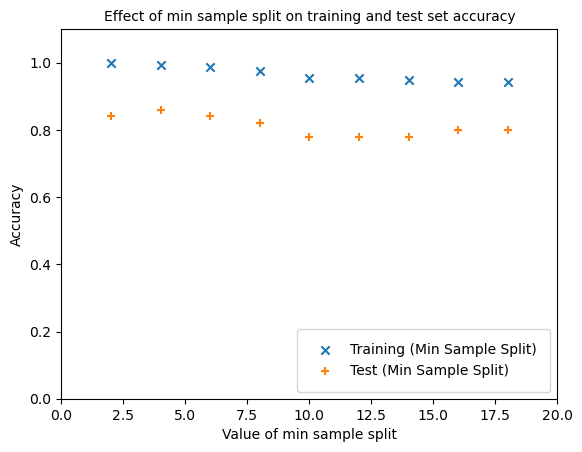

In [35]:
# Plot the accuracy on the training and test set
plt.scatter(df_train_results["min_samples_split"],df_train_results["score"],marker="x")
plt.scatter(df_test_results["min_samples_split"],df_test_results["score"],marker="+")
plt.xlim([0, max(min_samples_split)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of min sample split")
plt.ylabel("Accuracy")
legend_labels = ["Training (Min Sample Split)","Test (Min Sample Split)"]
plt.legend(labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of min sample split on training and test set accuracy", fontsize=10)
plt.show()

In [22]:
#hyperparamater tuning on max_depth
max_depth = list(range(2,10,1))
train_result_list_d =[]
test_result_list_d = []

for d in max_depth :
        model = RandomForestClassifier(max_depth=d,random_state=42)
        model.fit(X_train,y_train)
    
        #prediction on train data 
        y_pred_train_d = model.predict(X_train)
        score_train = accuracy_score(y_train, y_pred_train_d)
        precision_train = precision_score(y_train,y_pred_train_d, pos_label="yes")
        recall_train = recall_score(y_train,y_pred_train_d,pos_label="yes")
        train_result_list_d.append({"max_depth": d,"score":score_train,"precision":f"{precision_train:.2f}","recall":f"{recall_train:.2f}"})


         #prediction on test data 
        y_pred_test_d = model.predict(X_test)
        score_test = accuracy_score(y_test, y_pred_test_d)
        precision_test = precision_score(y_test, y_pred_test_d, pos_label="yes")
        recall_test = recall_score(y_test, y_pred_test_d,pos_label="yes")
        test_result_list_d.append({"max_depth": d,"score":score_test,"precision":f"{precision_test:.2f}","recall":f"{recall_test:.2f}"})



#data frames for train data 
df_train_results_d = pd.DataFrame(train_result_list_d).sort_values(by='score', ascending=False)
print(df_train_results_d[0:6])

#data frames for test data 
df_test_results_d = pd.DataFrame(test_result_list_d).sort_values(by='score', ascending=False)
print(df_test_results_d[0:6])
    

   max_depth     score precision recall
6          8  1.000000      1.00   1.00
7          9  1.000000      1.00   1.00
5          7  1.000000      1.00   1.00
4          6  0.993506      0.99   1.00
3          5  0.987013      0.98   1.00
2          4  0.961039      0.93   1.00
   max_depth  score precision recall
3          5   0.86      0.92   0.82
2          4   0.84      0.88   0.82
5          7   0.84      0.92   0.79
4          6   0.84      0.92   0.79
6          8   0.84      0.92   0.79
7          9   0.84      0.92   0.79


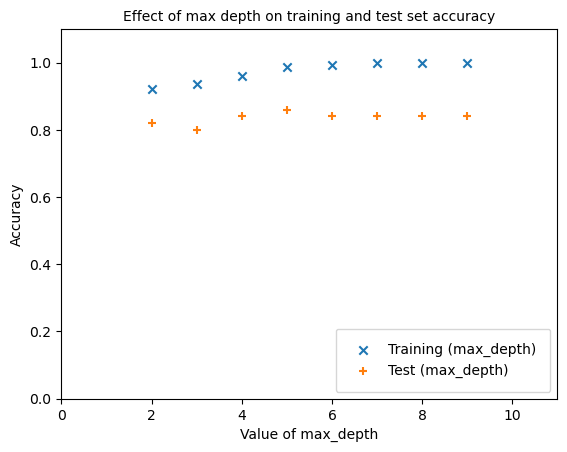

In [36]:
plt.scatter(df_train_results_d["max_depth"],df_train_results_d["score"],marker="x")
plt.scatter(df_test_results_d["max_depth"],df_test_results_d["score"],marker="+")
plt.xlim([0, max(max_depth)+2])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy")
legend_labels = ["Training (max_depth)","Test (max_depth)"]
plt.legend(labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of max depth on training and test set accuracy", fontsize=10)
plt.show()

In [25]:
train_result_list_d_s =[]
test_result_list_d_s =[]

for s in min_samples_split :
    for d in max_depth:
        model = RandomForestClassifier(min_samples_split=s,max_depth=d,random_state=42)
        model.fit(X_train,y_train)


        #prediction on train data 
        y_pred_train_d_s = model.predict(X_train)
        score_train = accuracy_score(y_train, y_pred_train_d_s)
        precision_train = precision_score(y_train,y_pred_train_d_s, pos_label="yes")
        recall_train = recall_score(y_train,y_pred_train_d_s,pos_label="yes")
        train_result_list_d_s.append({"min_samples_split": s,"max_depth":d,"score":score_train,"precision":f"{precision_train:.2f}","recall":f"{recall_train:.2f}"})


         #prediction on test data 
        y_pred_test_d_s = model.predict(X_test)
        score_test = accuracy_score(y_test, y_pred_test_d_s)
        precision_test = precision_score(y_test, y_pred_test_d_s, pos_label="yes")
        recall_test = recall_score(y_test, y_pred_test_d_s,pos_label="yes")
        test_result_list_d_s.append({"min_samples_split": s,"max_depth":d,"score":score_test,"precision":f"{precision_test:.2f}","recall":f"{recall_test:.2f}"})



#data frames for train data 
df_train_results_d_s = pd.DataFrame(train_result_list_d_s).sort_values(by='score', ascending=False)
print(df_train_results_d_s[0:6])

#data frames for test data 
df_test_results_d_s = pd.DataFrame(test_result_list_d_s).sort_values(by='score', ascending=False)
print(df_test_results_d_s[0:6])


    min_samples_split  max_depth     score precision recall
6                   2          8  1.000000      1.00   1.00
7                   2          9  1.000000      1.00   1.00
5                   2          7  1.000000      1.00   1.00
4                   2          6  0.993506      0.99   1.00
15                  4          9  0.993506      0.99   1.00
13                  4          7  0.993506      0.99   1.00
    min_samples_split  max_depth  score precision recall
3                   2          5   0.86      0.92   0.82
14                  4          8   0.86      0.92   0.82
15                  4          9   0.86      0.92   0.82
10                  4          4   0.86      0.89   0.86
6                   2          8   0.84      0.92   0.79
2                   2          4   0.84      0.88   0.82


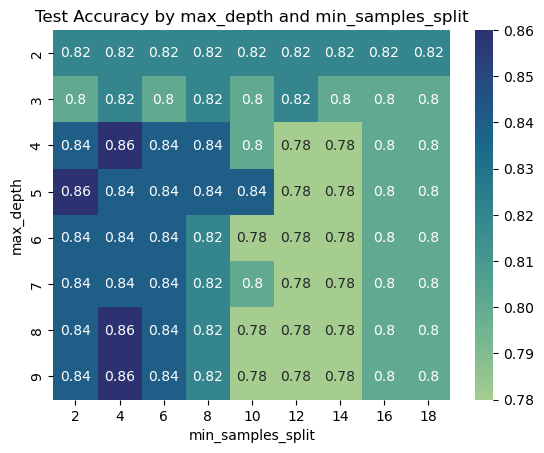

In [51]:
pivot = df_test_results_d_s.pivot(index="max_depth", columns="min_samples_split", values="score")
sns.heatmap(pivot, annot=True, cmap="crest")
plt.title("Test Accuracy by max_depth and min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

#code reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html